<a href="https://colab.research.google.com/github/cil4/inmersion_datos_AluraLatam/blob/main/Ejercicio_Aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import pandas as pd

inmuebles = pd.read_csv('/content/drive/MyDrive/inmersion_datos/inmuebles_bogota.csv') 
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [3]:
columnas = {'Baños':'Banos','Área':'Area'}
inmuebles = inmuebles.rename(columns=columnas)
inmuebles.sample(10)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
185,Apartamento,Apartamento en venta en La Calleja,3,3,150,La Calleja,USAQUÉN: Country Club + Santa Bárbara,$ 990.000.000
732,Apartamento,Apartamento en venta en Antonio Nariño,3,1,47,Antonio Nariño,Restrepo,$ 115.000.000
2432,Apartamento,Apartamento en venta en Kennedy,3,2,81,Kennedy,Kennedy Central,$ 360.000.000
1110,Apartamento,Apartamento en venta en Fontibón,3,2,62,Fontibón,Fontibón,$ 300.000.000
631,Apartamento,Apartamento en venta en Usaquén,1,1,47,Usaquén,Usaquén,$ 492.000.000
3104,Apartamento,Apartamento en venta en Usaquén,3,4,268,Usaquén,Usaquén,$ 1.880.000.000
5068,Apartamento,Apartamento en venta en Los Rosales,2,3,149,Los Rosales,CHAPINERO: Chicó Lago + El Refugio,$ 950.000.000
2383,Casa,Casa en venta en Teusaquillo,3,4,420,Teusaquillo,Teusaquillo,$ 2.200.000.000
6737,Apartamento,Apartamento en venta en Usaquén,3,4,170,Usaquén,Usaquén,$ 950.000.000
5106,Apartamento,Apartamento en venta en Kennedy,2,1,42,Kennedy,Kennedy Central,$ 147.000.000


In [4]:
valor = inmuebles.Valor.str.split(expand=True)
inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]
inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio
89,Apartamento,Apartamento en venta en Zona Noroccidental,2,2,60,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 225.000.000,$,225.000.000
4300,Apartamento,Apartamento en venta en Bosa,3,1,54,Bosa,Bosa Central,$ 158.000.000,$,158.000.000
2131,Apartamento,Apartamento en venta en Usaquén,3,2,95,Usaquén,Usaquén,$ 450.000.000,$,450.000.000


In [5]:
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True)

In [6]:
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000


In [7]:
pd.set_option('display.precision',2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


Desafíos

Estudiar mejor el histograma de valores, seleccionar 3 tipos de inmuebles (Refinar el gráfico: Títulos, aumentar el tamaño de labels, colores, conclusión de la información)

Precio del m2 por barrio y hacer el gráfico más adecuado para esta nueva variable.

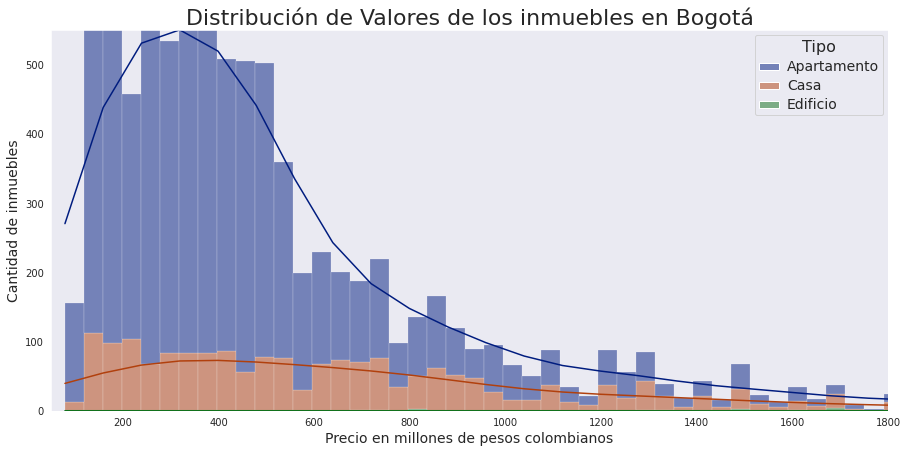

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

sns.set_palette('dark')
filtro_inmuebles = inmuebles.query('Tipo in["Apartamento", "Edificio", "Casa"]')

plt.figure(figsize=(15,7))
grafica = sns.histplot(data=filtro_inmuebles, x='Precio_Millon', kde=True, hue='Tipo', multiple='stack')
grafica.set_title('Distribución de Valores de los inmuebles en Bogotá', fontsize='22')
grafica.set_xlabel('Precio en millones de pesos colombianos', fontsize='14')
grafica.set_ylabel('Cantidad de inmuebles', fontsize='14')
plt.xlim((50,1800))
plt.ylim((0,550))

plt.setp(grafica.get_legend().get_texts(), fontsize='14')  
plt.setp(grafica.get_legend().get_title(), fontsize='16') 
plt.savefig('/content/drive/MyDrive/inmersion_datos/valor_inmuebles-desafio.png',format='png')
plt.show()

Del gráfico realizado podemos visualizar que a mayor precio la disponibilidad y oferta de los inmuebles mencionados decrecen, en el caso del tipo 'apartamento' su descenso es notorio y pronunciado, mientras que en el tipo 'casa' el descenso se realiza de manera más estable.


In [9]:
datos_barrio = inmuebles.groupby('Barrio').sum()

In [10]:
datos_barrio['m2'] = datos_barrio['Precio_Millon'] / datos_barrio['Area']


In [11]:
m2_barrio = dict(datos_barrio['m2'])


In [12]:
inmuebles['m2'] = inmuebles['Barrio']
inmuebles['m2'] = inmuebles['m2'].map(m2_barrio)

In [13]:
top_barrios = inmuebles['Barrio'].value_counts()[:10].index


In [14]:
datos_barrio.reset_index(inplace=True)


In [15]:
datos_barrio.query('Barrio in @top_barrios')


,Barrio,Habitaciones,Banos,Area,Precio_Millon,m2
5,Barrios Unidos,1525,1196,87799,259877.76,2.96
10,Bosa,1743,789,34879,93400.56,2.68
22,Cedritos,1458,1348,53711,270027.73,5.03
24,Chapinero,892,913,81248,372130.93,4.58
50,Engativa,1676,1077,59808,172711.73,2.89
63,Kennedy,2151,1233,61475,207963.65,3.38
125,Santa Barbara,1073,1162,54693,320097.80,5.85
132,Suba,1497,1202,61615,266406.04,4.32
138,Usaquén,3109,3044,148121,837710.36,5.66
148,Zona Noroccidental,2778,2204,119084,544453.06,4.57


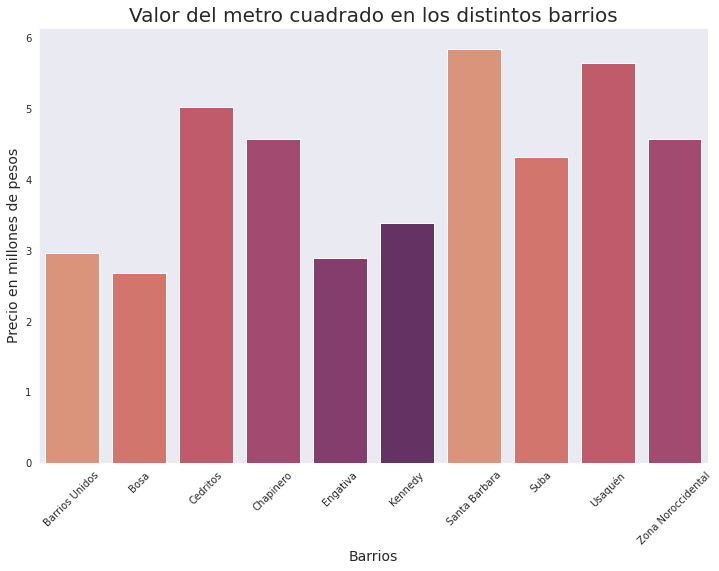

In [16]:
plt.figure(figsize=(12,8))

ax = sns.barplot(x="Barrio", y="m2", data = datos_barrio.query('Barrio in @top_barrios'),palette=sns.color_palette('flare'))
ax.tick_params(axis='x', rotation=45)
ax.set_title('Valor del metro cuadrado en los distintos barrios', fontsize=20)
plt.ylabel('Precio en millones de pesos', fontsize=14)
plt.xlabel('Barrios', fontsize=14);

plt.savefig('/content/drive/MyDrive/inmersion_datos/valor_m2_barrios-desafio.png',format='png')
